  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 22097  100 22097    0     0  51269      0 --:--:-- --:--:-- --:--:-- 52238
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1883  100  1883    0     0   5230      0 --:--:-- --:--:-- --:--:--     0:--:-- --:--:-- --:--:--  5334
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  7453  100  7453    0     0  23003      0 --:--:-- --:--:-- --:--:-- 23074
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   635  100   635    0     0   2267      0 --:--:-- --:--:-- --:--:--  2275
[[ 4.15924420e+01]
 [-

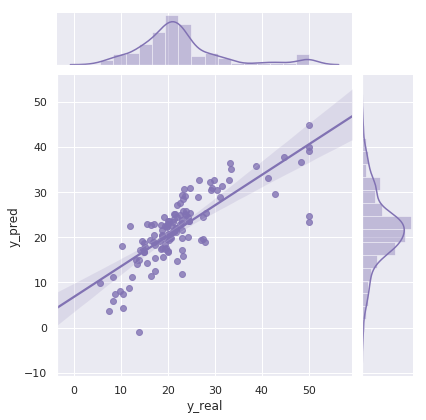

In [9]:
!curl https://raw.githubusercontent.com/tm200042/HW1_2/master/X_house_train.csv -o X_house_train.csv
!curl https://raw.githubusercontent.com/tm200042/HW1_2/master/y_house_train.csv -o y_house_train.csv
!curl https://raw.githubusercontent.com/tm200042/HW1_2/master/X_house_test.csv -o X_house_test.csv
!curl https://raw.githubusercontent.com/tm200042/HW1_2/master/y_house_test.csv -o y_house_test.csv
import numpy as np #arry, matrix
import pandas as pd #data processing
def read_data(feature_file,label_file):
    X_df = pd.read_csv(feature_file)
    y_df = pd.read_csv(label_file)
    #extract dta from the data frame
    X = X_df.values
    y = y_df.values 
    return X,y

X_train, y_train = read_data('X_house_train.csv', 'y_house_train.csv')
X_test, y_test = read_data('X_house_test.csv', 'y_house_test.csv')

    
#print (X_test,shape)

def predictor(X,c):
    
    '''
        X = [x_0, x_1, x_2, ..., x_n]
        c = [c_0, c_1, c_2, ..., c_n]
        x_0 = 1
        c_0: bias
        n = 5 (with current data)
        p(X) = <X,c> = c_0 * x_0 + c_1 * x_1 + ... + c_n * x_n
    '''
    return X.dot(c) #scalar product

def get_optimal_coeffs(X,y):
    
    '''
        X: feature vector
        y: label vector
        We use linear algebra approach
        X_transpose = X.T
        x^-1 = np.linalg.inv(X)
        c = (X^T*X)^(-1)*X^T*Y
    '''
    XT = X.T
    XTX = XT.dot(X)
    XTX_inv = np.linalg.inv(XTX) 
    optimal_coeffs = (XTX_inv.dot(XT)).dot(y)
    
    return optimal_coeffs

def RMSE(y_pred, y_real):
    
    '''
        Compare the difference betwwen predicted
        and real values
    '''
    N = float(len(y_real)) #len() gives an integer value
    #y_real - y_pred = ???
    #y_real = np.array([1,2,3])
    #y_pred = np.array([4,5,6])
    #y_real - y_pred = ([-3,-3,-3])
    #(y_real - y_pred)**2 = ([(-3)^2,(-3)^2,(-3)^2])
    #sum(y_real - y_pred) = sum of all components in the vector
    rmse = np.sqrt(sum((y_real - y_pred)**2)/N) #valid for numpy
    return rmse

def add_vector_one(X):
    
    '''
    add a column of 1 to the current feature
    X ->[1 X]
    '''
    #X.shape = [# of rows, # of cols]
    #X.shape[0] = # of rows = n
    ones = np.ones(X.shape[0]) #create vector with all components being 1
    #ones.shap = (n, )
    ones = ones.reshape(-1,1) #convert a vector to matrix with # of cols=1
    #ones.shape = (n,1) # matrix
    X_new = np.append(ones, X, axis=1)  #add ones to X
    # axis = 0, add along horzontal direction
    # axis = 1, add along vertical direction
    return X_new

X_train_new = add_vector_one(X_train)
X_test_new = add_vector_one(X_test)
'''
    Train model
'''
c_opt = get_optimal_coeffs(X_train_new, y_train)
'''
    Predict the test set (X_test)
'''
y_pred = predictor(X_test_new, c_opt)
'''
    Calcualte model error
'''
print(c_opt)
model_RMSE = RMSE(y_pred, y_test)
print()
print(model_RMSE)






def comparision_plot(y_real, y_pred):
    import seaborn as sns
    import pandas as pd
    df = pd.DataFrame(data=y_real[:,0], columns=['y_real'])
    df['y_pred'] = y_pred[:,0]
    sns.set(style="darkgrid")
    g = sns.jointplot("y_real","y_pred",data=df, kind="reg", color="m")
    
comparision_plot(y_test,y_pred)



In [ ]:
!curl https://raw.githubusercontent.com/tm200042/HW1_2/master/X_house_train.csv -o X_house_train.csv
!curl https://raw.githubusercontent.com/tm200042/HW1_2/master/y_house_train.csv -o y_house_train.csv
!curl https://raw.githubusercontent.com/tm200042/HW1_2/master/X_house_test.csv -o X_house_test.csv
!curl https://raw.githubusercontent.com/tm200042/HW1_2/master/y_house_test.csv -o y_house_test.csv
import numpy as np #arry, matrix
import pandas as pd #data processing
def read_data(feature_file,label_file):
    X_df = pd.read_csv(feature_file)
    y_df = pd.read_csv(label_file)
    #extract dta from the data frame
    X = X_df.values
    y = y_df.values 
    return X,y

X_train, y_train = read_data('X_house_train.csv', 'y_house_train.csv')
X_test, y_test = read_data('X_house_test.csv', 'y_house_test.csv')

    
#print (X_test,shape)

def predictor(X,c):
    
    '''
        X = [x_0, x_1, x_2, ..., x_n]
        c = [c_0, c_1, c_2, ..., c_n]
        x_0 = 1
        c_0: bias
        n = 5 (with current data)
        p(X) = <X,c> = c_0 * x_0 + c_1 * x_1 + ... + c_n * x_n
    '''
    return X.dot(c) #scalar product

def get_optimal_coeffs(X,y):
    
    '''
        X: feature vector
        y: label vector
        We use linear algebra approach
        X_transpose = X.T
        x^-1 = np.linalg.inv(X)
        c = (X^T*X)^(-1)*X^T*Y
    '''
    XT = X.T
    XTX = XT.dot(X)
    XTX_inv = np.linalg.inv(XTX) 
    optimal_coeffs = (XTX_inv.dot(XT)).dot(y)
    
    return optimal_coeffs

def RMSE(y_pred, y_real):
    
    '''
        Compare the difference betwwen predicted
        and real values
    '''
    N = float(len(y_real)) #len() gives an integer value
    #y_real - y_pred = ???
    #y_real = np.array([1,2,3])
    #y_pred = np.array([4,5,6])
    #y_real - y_pred = ([-3,-3,-3])
    #(y_real - y_pred)**2 = ([(-3)^2,(-3)^2,(-3)^2])
    #sum(y_real - y_pred) = sum of all components in the vector
    rmse = np.sqrt(sum((y_real - y_pred)**2)/N) #valid for numpy
    return rmse

def add_vector_one(X):
    
    '''
    add a column of 1 to the current feature
    X ->[1 X]
    '''
    #X.shape = [# of rows, # of cols]
    #X.shape[0] = # of rows = n
    ones = np.ones(X.shape[0]) #create vector with all components being 1
    #ones.shap = (n, )
    ones = ones.reshape(-1,1) #convert a vector to matrix with # of cols=1
    #ones.shape = (n,1) # matrix
    X_new = np.append(ones, X, axis=1)  #add ones to X
    # axis = 0, add along horzontal direction
    # axis = 1, add along vertical direction
    return X_new

X_train_new = add_vector_one(X_train)
X_test_new = add_vector_one(X_test)
'''
    Train model
'''
c_opt = get_optimal_coeffs(X_train_new, y_train)
'''
    Predict the test set (X_test)
'''
y_pred = predictor(X_test_new, c_opt)
'''
    Calcualte model error
'''
model_RMSE = RMSE(y_pred, y_test)
print()
print('The RMSE of our LR model is %.3f' % model_RMSE)

def comparision_plot(y_real, y_pred):
    import seaborn as sns
    import pandas as pd
    df = pd.DataFrame(data=y_real[:,0], columns=['y_real'])
    df['y_pred'] = y_pred[:,0]
    sns.set(style="darkgrid")
    g = sns.jointplot("y_real","y_pred",data=df, kind="reg", color="m")
    
comparision_plot(y_test,y_pred)

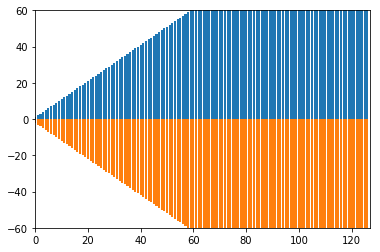

In [59]:
# Plot the pred and real data
import matplotlib.pyplot as plt
import numpy as np
n=127
X= np.arange(n)

plt.xlim(0,127)
plt.ylim(-60,60)
Y_1 = X+1
Y_2 = X+2

plt.bar(X, +(Y_1))
plt.bar(X, -(Y_2))


plt.show();



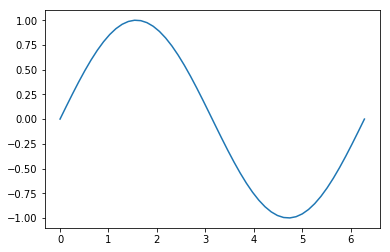

In [52]:
import matplotlib.pyplot as plt
import numpy as np
x=np.linspace(0, 2* np.pi, 50)
plt.plot(x, np.sin(x))
plt.show();